In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

Mounted at /content/drive


In [ ]:
#read the train and test data
Train_data = pd.read_csv('Path of train.csv')
Test_data = pd.read_csv('Path of test.csv')

#seprate images and the Labels
Train_images = Train_data.drop('label', axis=1).values / 255.0
Test_images = Test_data.drop('label', axis=1).values / 255.0

#fetching the labels
Train_l = Train_data['label'].values
Test_l = Test_data['label'].values

In [ ]:
def PCA(data, no_comp):
    #first find the mean of the data
    mean_data = data - np.mean(data, axis=0)
    print('Mean calculation completed\n')

    #covariance matrix
    cov_mat = np.cov(mean_data, rowvar=False)
    print('Covariance matrix calculation completed\n')

    # finding the eigon values and eigon vector
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    print('Eigen values and vectors calculation completed\n')

    #Sort eigenvectors and eigonvalues
    sorted_idx = np.argsort(eigen_values)[::-1]
    top_eigen_vecs = eigen_vectors[:, sorted_idx[:no_comp]]
    print('Top eigen vectors calculation completed\n')

    #Project the data
    reduced = np.dot(mean_data, top_eigen_vecs)
    return reduced, top_eigen_vecs

Mean calculation completed

Covariance matrix calculation completed

Eigen values and vectors calculation completed

Top eigen vectors calculation completed

PCA for training data completed

PCA for test data completed

k=1, Total accuracy: 84.3%
Confusion matrix for k=1:
[[809   1  17  20   8   0 136   2   7   0]
 [  3 973   1  14   2   0   7   0   0   0]
 [ 20   1 723  13 135   0 104   0   4   0]
 [ 43  10  12 864  39   0  30   0   2   0]
 [  5   0 101  34 760   0  99   0   1   0]
 [  0   0   1   1   0 869   1  77   6  45]
 [159   3  91  27  91   0 620   0   9   0]
 [  0   0   0   0   0  32   0 905   0  63]
 [  5   0   9   1   4   3   8   3 965   2]
 [  0   0   0   0   0  13   0  45   0 942]]

k=2, Total accuracy: 84.23%
Confusion matrix for k=2:
[[903   2  19  13   7   0  48   2   6   0]
 [  5 979   2  12   0   0   2   0   0   0]
 [ 33   1 826  13  91   0  35   0   1   0]
 [ 64  22  17 869  20   0   7   0   1   0]
 [  9   0 174  48 735   0  33   0   1   0]
 [  0   0   1   2   0 919 

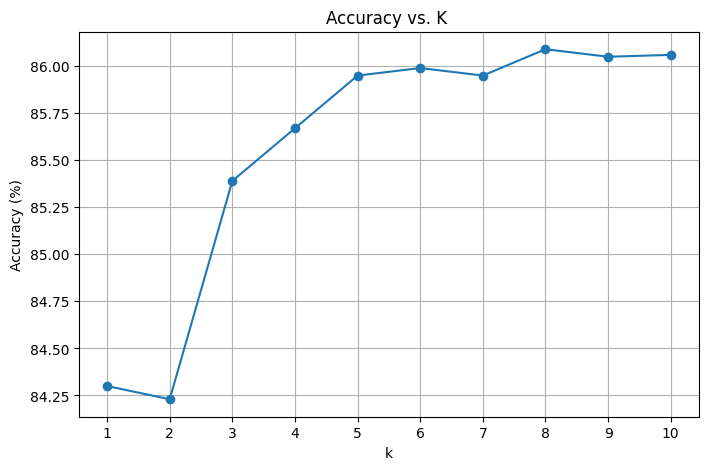

In [ ]:
#PCA for Training data
train_pca, pca_components = PCA(Train_images, no_comp=40)
print('PCA for training data completed\n')

#fit the test data in same PCA
test_mean = Test_images - np.mean(Train_images, axis=0)
test_pca = np.dot(test_mean, pca_components)
print('PCA for test data completed\n')

#KNN implementation
def knn_predict(Train_images, Train_l, Test_images, k):
    preds = []
    for x in Test_images:
        dists = np.linalg.norm(Train_images - x, axis=1)
        idxs = np.argsort(dists)[:k]  #choose the k nearest neighbours from all the distances

        vals, counts = np.unique(Train_l[idxs], return_counts=True)
        preds.append(vals[np.argmax(counts)])
    return np.array(preds)

#array to store the accuracy of different values of k
accu = []

#Run loop for all the different values of the k
for k in range(1, 11):
    preds = knn_predict(train_pca, Train_l, test_pca, k)

    #find the accuracy based on the predictions
    acc = accuracy_score(Test_l, preds)
    accu.append(acc)
    print(f"k={k}, Total accuracy: {acc*100}%")

    cm = confusion_matrix(Test_l, preds)
    print(f"Confusion matrix for k={k}:\n{cm}\n")


#print all results
plt.figure(figsize=(8, 5))  #adding figure
plt.plot(range(1, 11), [a*100 for a in accu], marker='o', linestyle='-')
plt.title('Accuracy vs. K ')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()
